<a href="https://colab.research.google.com/github/KleaKalliri/Computer-Vision/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Task 1 & Task 2

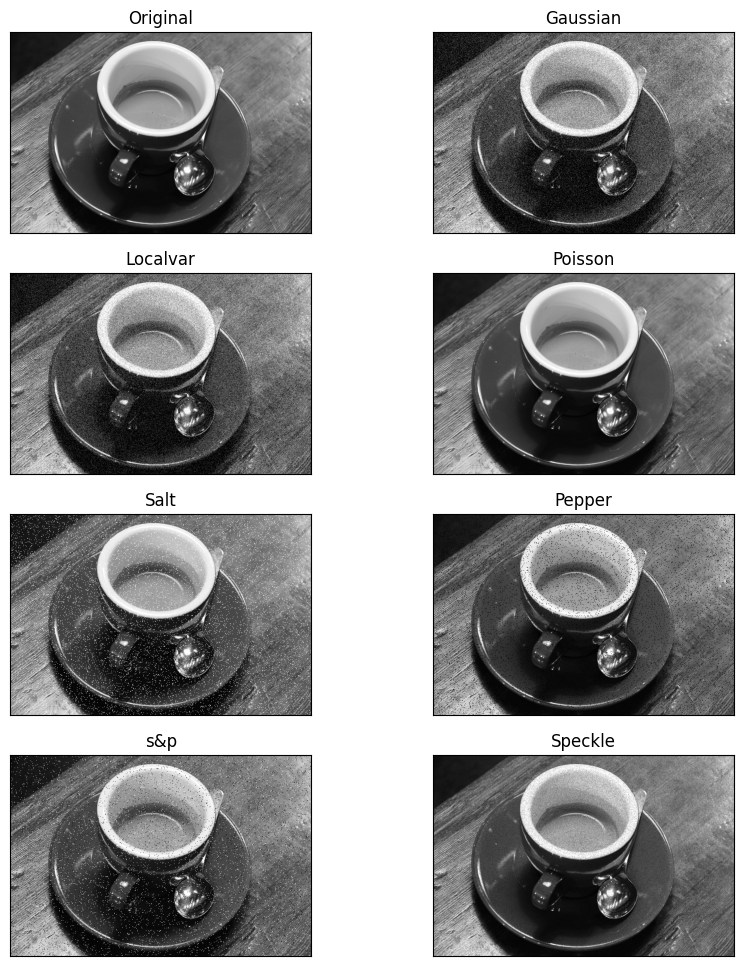

In [14]:
from skimage import data, img_as_float,util,color
import matplotlib.pyplot as plt

img = data.coffee()
img = color.rgb2gray(img)
img = img_as_float(img)

fig = plt.figure(figsize=(10,12))

img2 = util.random_noise(img, mode='gaussian')
img3 = util.random_noise(img, mode='localvar')
img4 = util.random_noise(img, mode='poisson')
img5 = util.random_noise(img, mode='salt')
img6 = util.random_noise(img, mode='pepper')
img7 = util.random_noise(img, mode='s&p')
img8 = util.random_noise(img, mode='speckle')

plt.subplot(421), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(422), plt.imshow(img2, cmap='gray')
plt.title('Gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(423), plt.imshow(img3, cmap='gray')
plt.title('Localvar'), plt.xticks([]), plt.yticks([])
plt.subplot(424), plt.imshow(img4, cmap='gray')
plt.title('Poisson'), plt.xticks([]), plt.yticks([])
plt.subplot(425), plt.imshow(img5, cmap='gray')
plt.title('Salt'), plt.xticks([]), plt.yticks([])
plt.subplot(426), plt.imshow(img6, cmap='gray')
plt.title('Pepper'), plt.xticks([]), plt.yticks([])
plt.subplot(427), plt.imshow(img7, cmap='gray')
plt.title('s&p'), plt.xticks([]), plt.yticks([])
plt.subplot(428), plt.imshow(img8, cmap='gray')
plt.title('Speckle'), plt.xticks([]), plt.yticks([])

plt.show()

Task 3

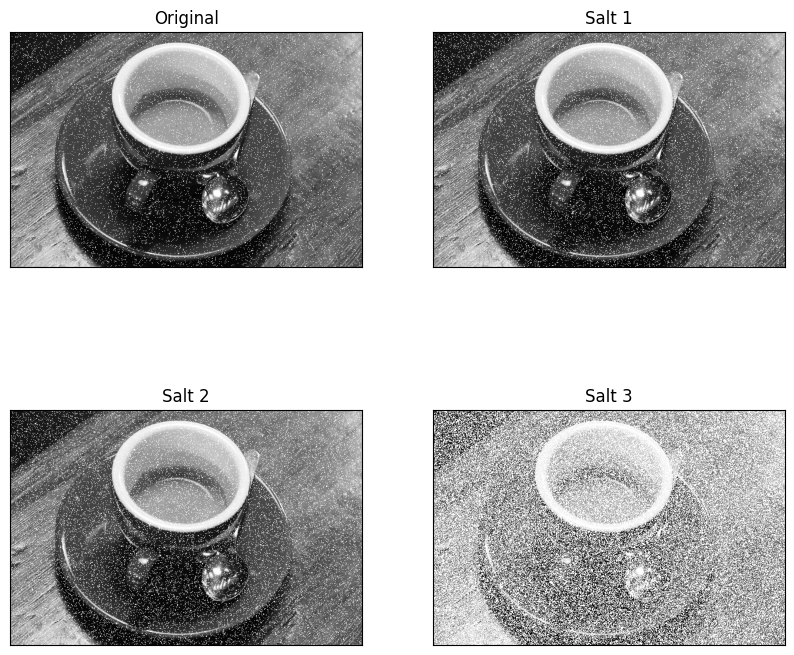

In [33]:
from skimage import data, img_as_float,util,color
import matplotlib.pyplot as plt

img5 = util.random_noise(img, mode='salt')

img5_s1 = util.random_noise(img, mode='salt', amount=0.075)
img5_s2 = util.random_noise(img, mode='salt', amount=0.1)
img5_s3 = util.random_noise(img, mode='salt', amount=0.5)

fig = plt.figure(figsize=(10,9))

plt.subplot(221), plt.imshow(img5, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img5_s1, cmap='gray')
plt.title('Salt 1'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img5_s2, cmap='gray')
plt.title('Salt 2'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img5_s3, cmap='gray')
plt.title('Salt 3'), plt.xticks([]), plt.yticks([])

plt.show()

Task 4

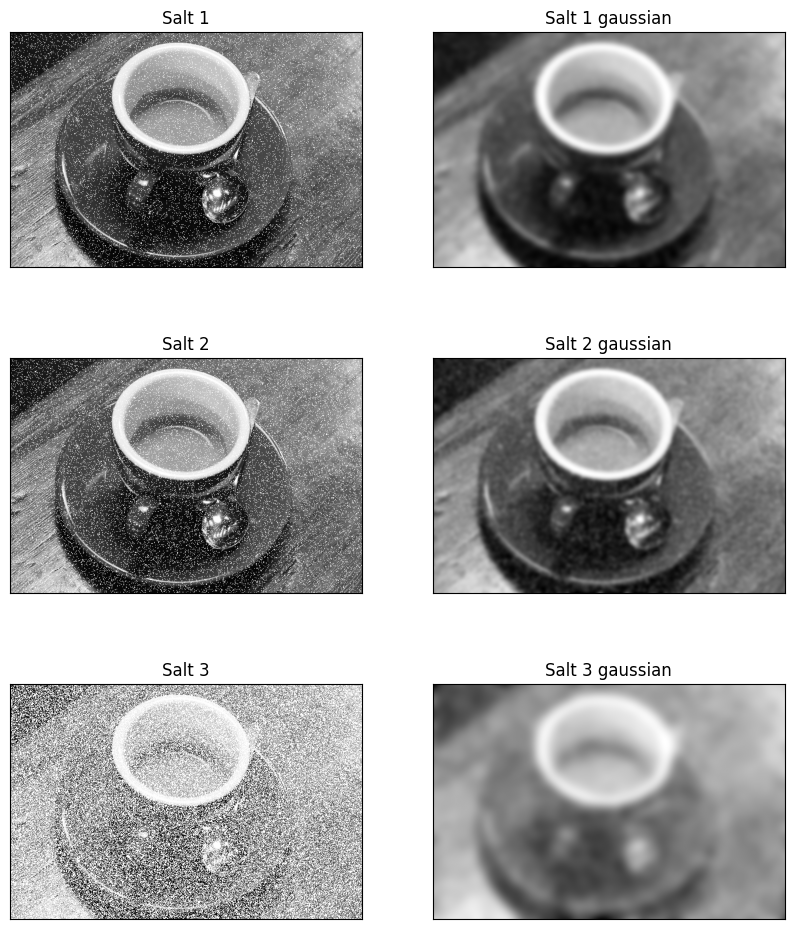

In [34]:
from skimage.filters import gaussian

img5_s1_g = gaussian(img5_s1, sigma=5)
img5_s2_g = gaussian(img5_s2, sigma=3)
img5_s3_g = gaussian(img5_s3, sigma=9)

fig = plt.figure(figsize=(10,12))

plt.subplot(321), plt.imshow(img5_s1, cmap='gray')
plt.title('Salt 1'), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(img5_s1_g, cmap='gray')
plt.title('Salt 1 gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(323), plt.imshow(img5_s2, cmap='gray')
plt.title('Salt 2'), plt.xticks([]), plt.yticks([])
plt.subplot(324), plt.imshow(img5_s2_g, cmap='gray')
plt.title('Salt 2 gaussian'), plt.xticks([]), plt.yticks([])
plt.subplot(325), plt.imshow(img5_s3, cmap='gray')
plt.title('Salt 3'), plt.xticks([]), plt.yticks([])
plt.subplot(326), plt.imshow(img5_s3_g, cmap='gray')
plt.title('Salt 3 gaussian'), plt.xticks([]), plt.yticks([])

plt.show()

**Comment:** As the sigma value increases, the image becomes blurrier, so the noise is reduced. But if the noise has a high intensity like in the third generated image, the sigma will have to increase a lot to eliminate the noise, but the image would not be distinguishable from what it is if we did something like that. So the edges become very smooth.

Task 5

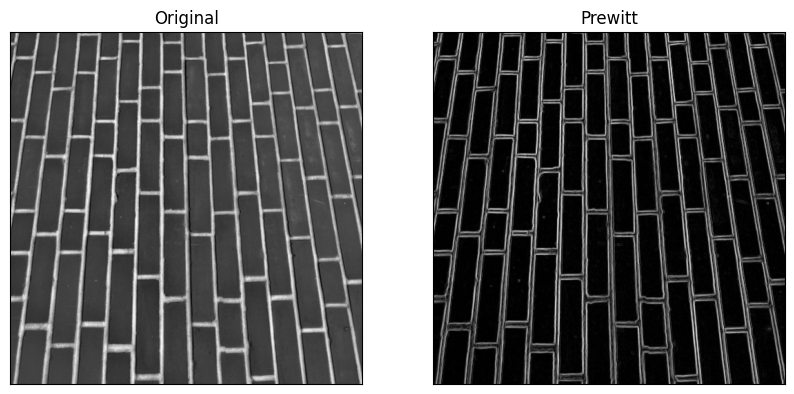

In [41]:
from skimage import data, img_as_float,util,color, img_as_ubyte
import matplotlib.pyplot as plt
from skimage.filters import prewitt

img2 = data.brick()
# img2 = color.rgb2gray(img2)
img2 = img_as_ubyte(img2)

img2_prew = prewitt(img2)

fig = plt.figure(figsize=(10,12))

plt.subplot(121), plt.imshow(img2, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2_prew, cmap='gray')
plt.title('Prewitt'), plt.xticks([]), plt.yticks([])

fig.show()

In [42]:
import numpy as np

n = img2.shape[0]*img2.shape[1]
edges = img2_prew < 0.01
num_edges = np.sum(edges)
num_bricks = n - num_edges

fraction_bricks = num_bricks/n
fraction_edges = num_edges/n
fraction_bricks, fraction_edges

(np.float64(0.37761688232421875), np.float64(0.6223831176757812))

Task 6

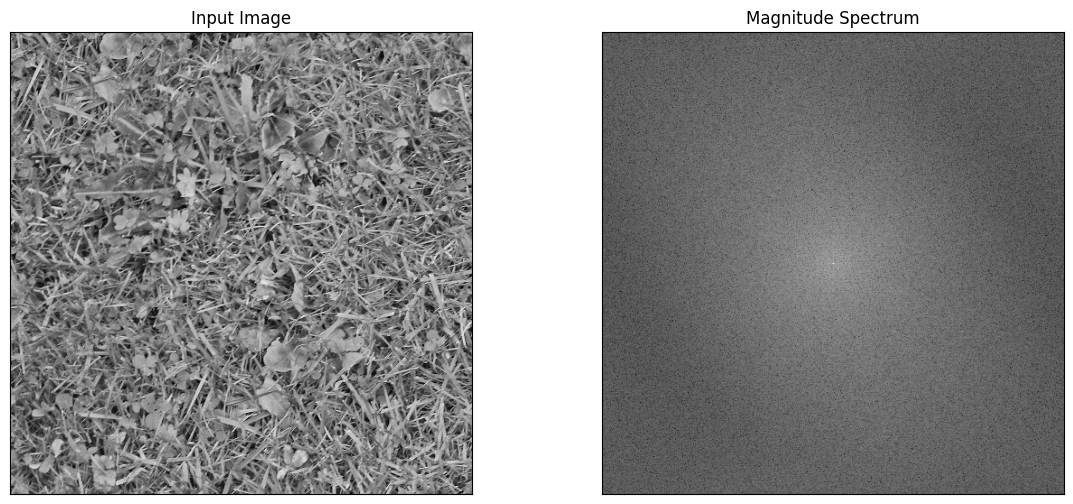

In [46]:
from skimage import data, img_as_float,util,color
import matplotlib.pyplot as plt

img3 = data.grass()
img3 = img_as_ubyte(img3)

f = np.fft.fft2(img3)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(img3, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

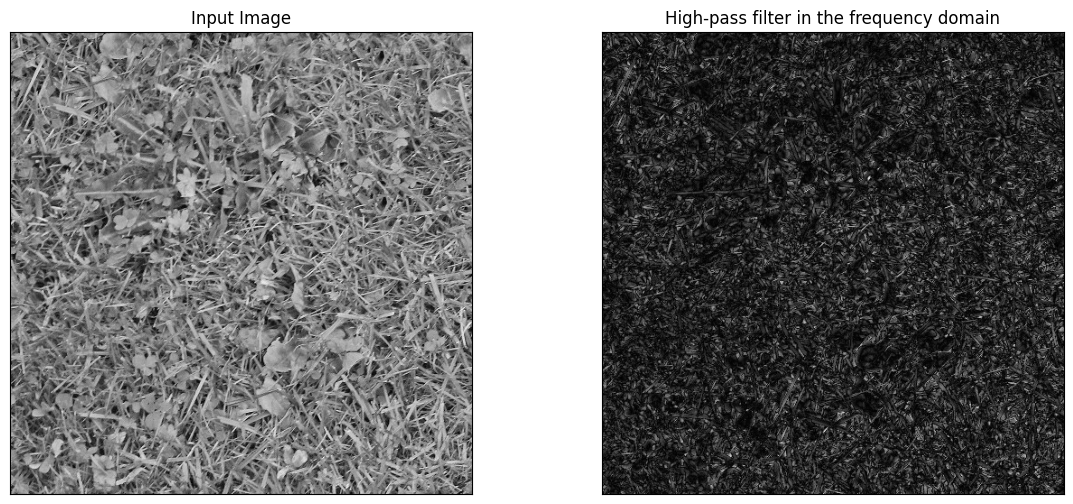

In [48]:
rows, cols = img3.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img3_back = np.fft.ifft2(f_ishift)
img3_back = np.abs(img3_back)

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(img3, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3_back, cmap = 'gray')
plt.title('High-pass filter in the frequency domain'), plt.xticks([]), plt.yticks([])
plt.show()

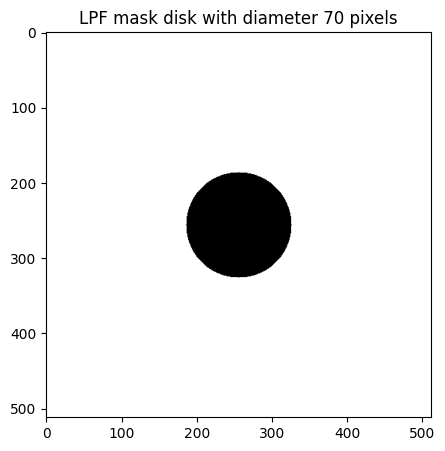

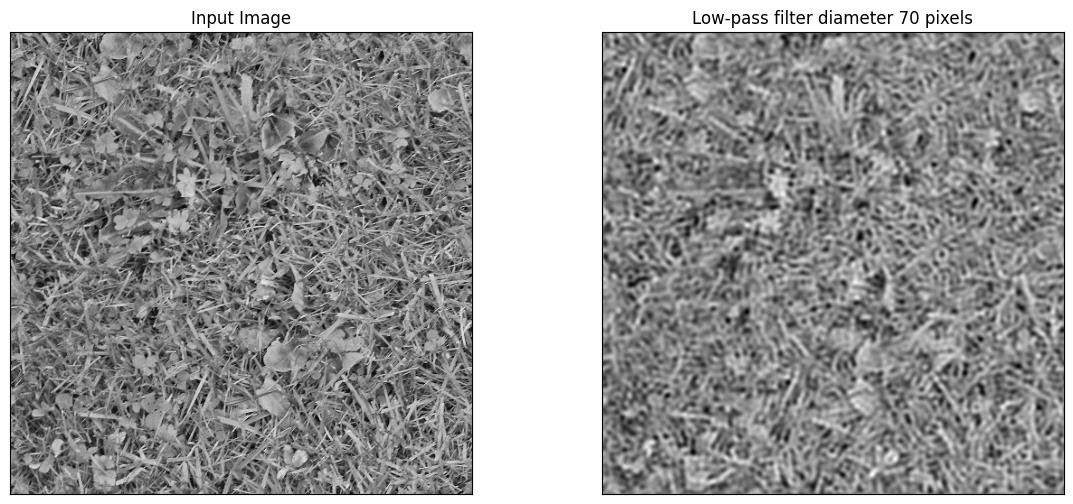

In [54]:
nrows, ncols = img3.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
disk_diameter = 70
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (disk_diameter)**2)

f = np.fft.fft2(img3)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fshift[outer_disk_mask] = 0
f_ishift = np.fft.ifftshift(fshift)
img3_back = np.fft.ifft2(f_ishift)
img3_back = np.abs(img3_back)

fig = plt.figure(figsize=(5,5))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('LPF mask disk with diameter {} pixels'.format(disk_diameter))
plt.show()

fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(img3, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img3_back, cmap = 'gray')
plt.title('Low-pass filter diameter {} pixels'.format(disk_diameter)), plt.xticks([]), plt.yticks([])
plt.show()

**Comment:** Fine texture and edges in the grass correspond to high-frequency components in the Fourier Transform. These components appear as points or regions farther from the center in the frequency spectrum. Gradual variations in the grass image correspond to low-frequency components near the center of the spectrum.

Task 7

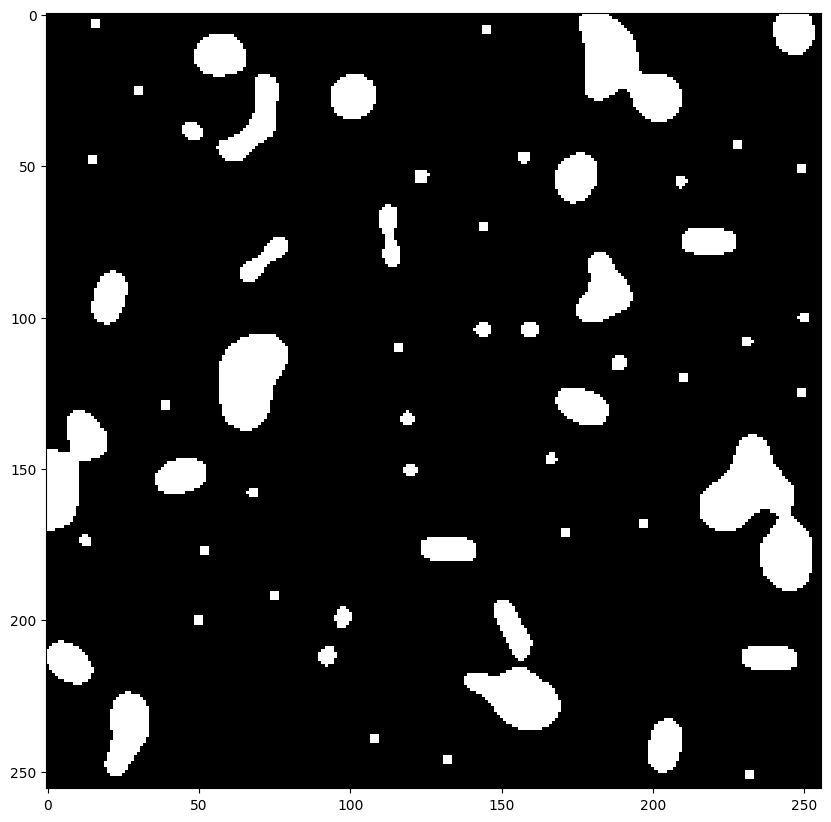

In [99]:
from skimage import data
import matplotlib.pyplot as plt

image = data.binary_blobs(length=256, volume_fraction=0.1, rng=2)
fig = plt.figure(figsize=(10,12))

plt.imshow(image, cmap='gray')
plt.show()

Number of erosions needed to remove all blobs: 3


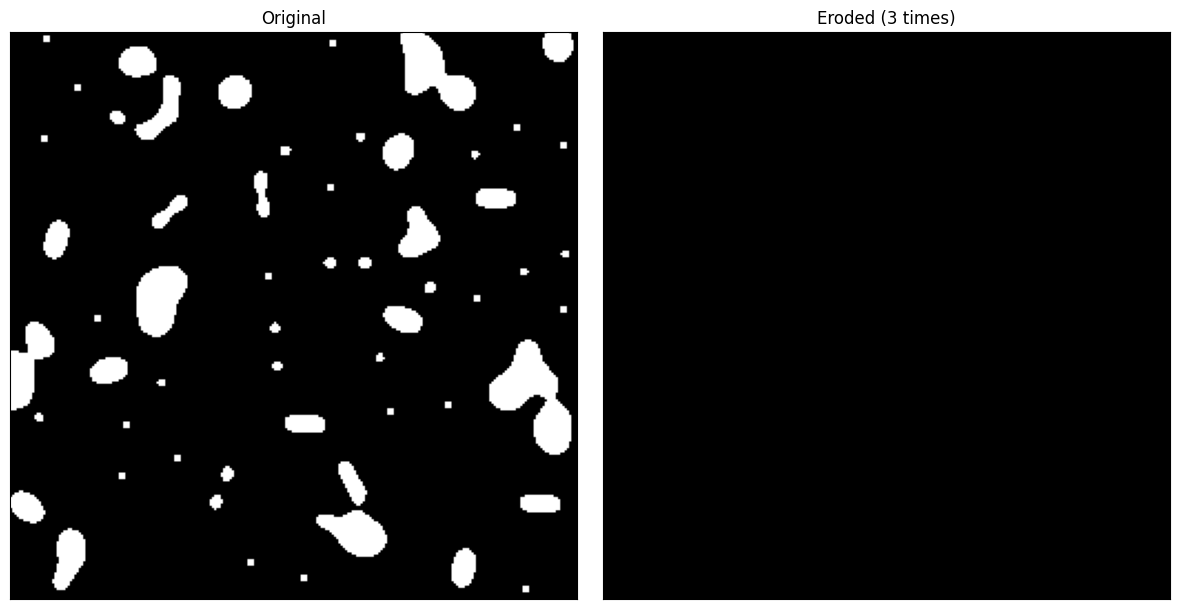

In [102]:
from skimage.morphology import erosion,disk
import matplotlib.pyplot as plt

selem = disk(3)
image_eroded = erosion(image, selem)

num_erosions = 0
while image_eroded.any():
    image_eroded = erosion(image_eroded, selem)
    num_erosions += 1


print(f"Number of erosions needed to remove all blobs: {num_erosions}")

fig = plt.figure(figsize=(12, 6))
plt.subplot(121),plt.imshow(image, cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image_eroded2, cmap = 'gray')
plt.title('Eroded ({} times)'.format(num_erosions)), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()